In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm

import seaborn as sns
import pandas as pd

In [2]:
plt.style.use("seaborn-whitegrid")

In [3]:
b1 = [0.9  , 0.919, 0.937, 0.956, 0.975, 0.993, 1.01 , 1.03 , 1.05 ,
      1.07 , 1.09 , 1.11 , 1.12 , 1.14 , 1.16 , 1.18 , 1.2  , 1.22 ,
      1.24 , 1.25 , 1.27 , 1.29 , 1.31 , 1.33 , 1.35 , 1.37 , 1.38 ,
      1.4  , 1.42 , 1.44 , 1.46 , 1.48 , 1.5  , 1.52 , 1.53 , 1.53 ,
      1.55 , 1.57 , 1.59 , 1.61 , 1.62 , 1.63 , 1.65 , 1.66 , 1.68 ,
      1.7  , 1.72 , 1.74 , 1.76 , 1.78 , 1.79 , 1.81 , 1.83 , 1.85 ,
      1.87 , 1.89 , 1.91 , 1.93 , 1.94 , 1.96 , 1.98 , 2.   ]
b2 = b1
density = np.load("two_field_density.npy")
persistence = np.load("two_field_persistence.npy")

# Let's check if density when $b_1 = b_2$ is simmilar with regular game

<IPython.core.display.Javascript object>


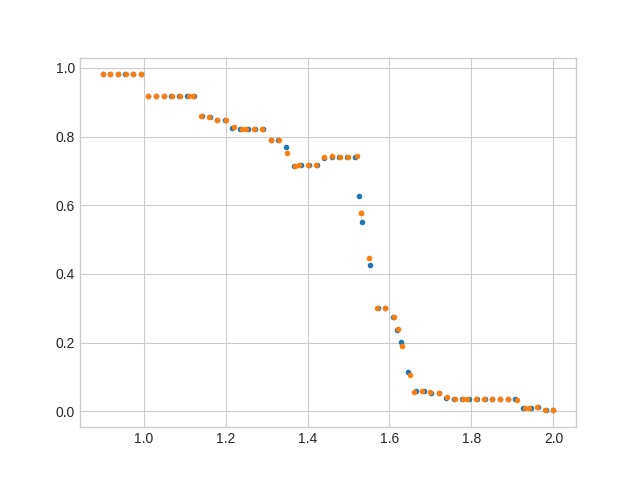

In [4]:
fig = plt.figure('Game Comparison')
plt.plot([0.9, 0.91864407, 0.93728814, 0.9559322 , 0.97457627,
     0.99322034, 1.01186441, 1.03050847, 1.04915254, 1.06779661,
     1.08644068, 1.10508475, 1.12372881, 1.14237288, 1.16101695,
     1.17966102, 1.19830508, 1.21694915, 1.23559322, 1.25423729,
     1.27288136, 1.29152542, 1.31016949, 1.32881356, 1.34745763,
     1.36610169, 1.38474576, 1.40338983, 1.4220339 , 1.44067797,
     1.45932203, 1.4779661 , 1.49661017, 1.51525424, 1.526     ,
     1.53389831, 1.55254237, 1.57118644, 1.58983051, 1.60847458,
     1.618     , 1.62711864, 1.64576271, 1.66440678, 1.68305085,
     1.70169492, 1.72033898, 1.73898305, 1.75762712, 1.77627119,
     1.79491525, 1.81355932, 1.83220339, 1.85084746, 1.86949153,
     1.88813559, 1.90677966, 1.92542373, 1.9440678 , 1.96271186,
     1.98135593, 2.0], np.load("data/200MeanGame/density.npy").mean(axis=-1).mean(axis=-1), ".")
plt.plot(b1,density.mean(axis=-1).diagonal(), ".")
plt.show()

# Now let's look at average density for two fields

<IPython.core.display.Javascript object>


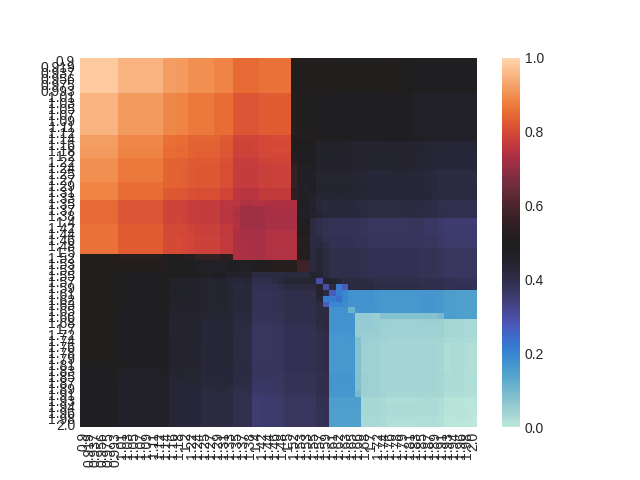

In [5]:
fig = plt.figure('Avg density')
sns.heatmap(density.mean(axis=-1), vmin=0, vmax=1, center=1/2, xticklabels=b2, yticklabels=b1)
plt.show()

<IPython.core.display.Javascript object>


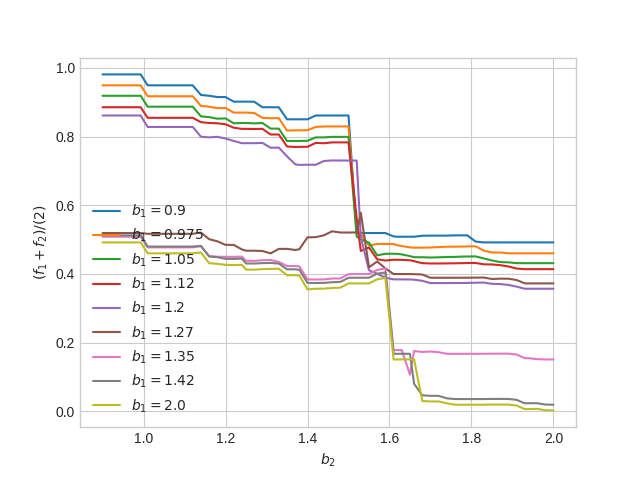

In [6]:
fig = plt.figure("Some b1")
for i in range(8):
    plt.plot(b2, density[7*i].mean(axis=-1), label=f"$b_1={b1[4*i]}$")
plt.plot(b2, density[-1].mean(axis=-1), label=f"$b_1={b1[-1]}$")
plt.ylabel('$(f_1+f_2)/(2)$')
plt.xlabel('$b_2$')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


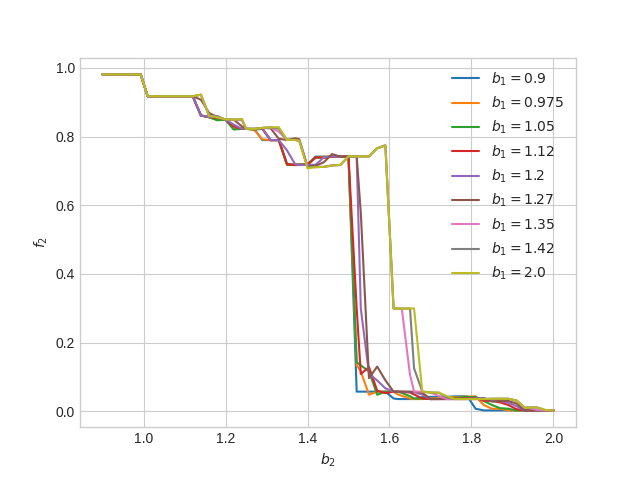

In [7]:
fig = plt.figure("f_2")
for i in range(8):
    plt.plot(b2, density[7*i, ..., 1], label=f"$b_1={b1[4*i]}$")
plt.plot(b2, density[-1, ..., 1], label=f"$b_1={b1[-1]}$")
plt.ylabel('$f_2$')
plt.xlabel('$b_2$')
plt.legend()
plt.show()

In [8]:
from mpl_toolkits.mplot3d import axes3d

<IPython.core.display.Javascript object>


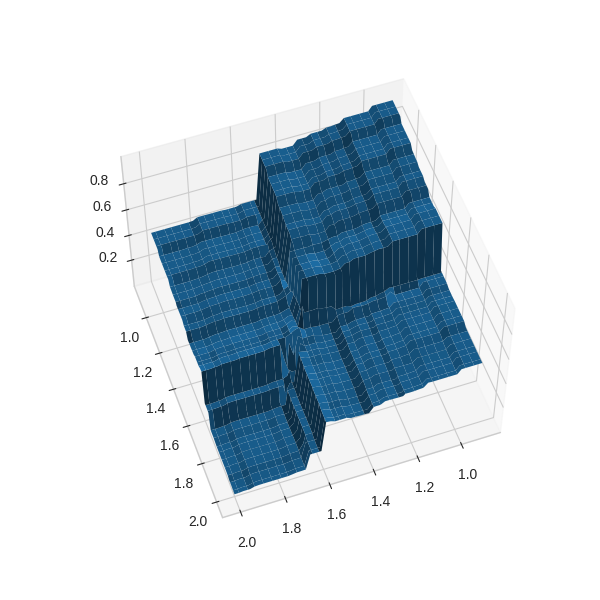

In [9]:
X,Y = np.meshgrid(b1, b2)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(X, Y, density.mean(axis=-1))


plt.show()

<IPython.core.display.Javascript object>


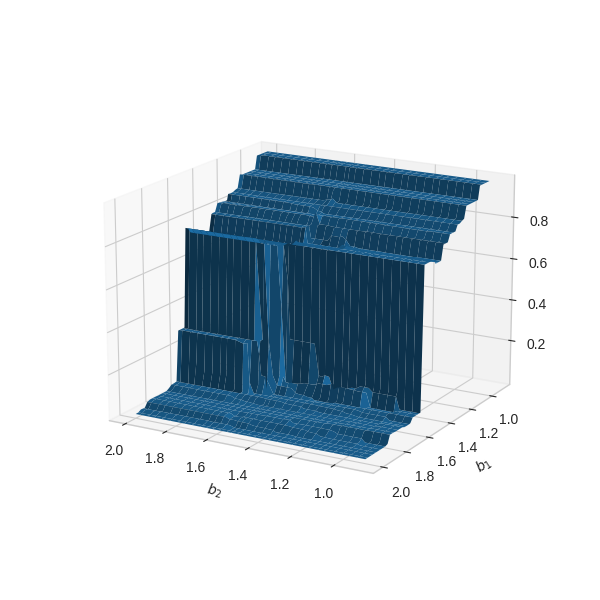

In [10]:
X,Y = np.meshgrid(b1, b2)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(X, Y, density[..., 0])
ax.set_xlabel("$b_2$")
ax.set_ylabel("$b_1$")

plt.show()

## Two heatmaps

<IPython.core.display.Javascript object>


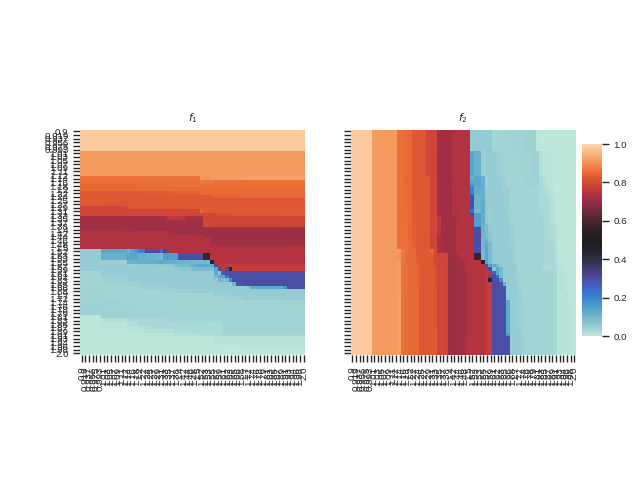

In [11]:
sns.set_context("paper", font_scale=0.8)
grid_kws = {"width_ratios": (.5, .5), "hspace": .3}
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, gridspec_kw=grid_kws)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
# ax1.set_box_aspect(1)
# ax2.set_box_aspect(1)
ax1.set_title("$f_1$")
ax2.set_title("$f_2$")
sns.heatmap(density[..., 0], ax=ax1, xticklabels=b2, yticklabels=b1,
            vmin=0, vmax=1, center=1/2, cbar=False, square=True)
sns.heatmap(density[..., 1], ax=ax2, xticklabels=b2, yticklabels=b1,
            vmin=0, vmax=1, center=1/2, cbar=True, cbar_ax=cbar_ax, square=True)
plt.show()

<IPython.core.display.Javascript object>


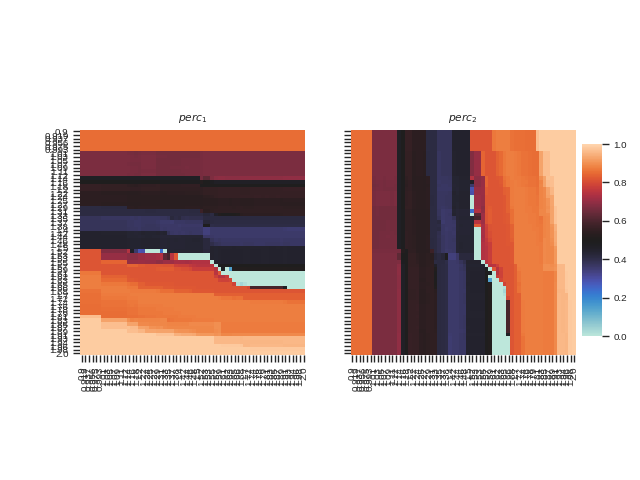

In [12]:
sns.set_context("paper", font_scale=0.8)
grid_kws = {"width_ratios": (.5, .5), "hspace": .3}
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, gridspec_kw=grid_kws)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
# ax1.set_box_aspect(1)
# ax2.set_box_aspect(1)
ax1.set_title("$perc_1$")
ax2.set_title("$perc_2$")
sns.heatmap(persistence[..., 0], ax=ax1, xticklabels=b2, yticklabels=b1,
            vmin=0, vmax=1, center=1/2, cbar=False, square=True)
sns.heatmap(persistence[..., 1], ax=ax2, xticklabels=b2, yticklabels=b1,
            vmin=0, vmax=1, center=1/2, cbar=True, cbar_ax=cbar_ax, square=True)
plt.show()

## Persistence

<IPython.core.display.Javascript object>


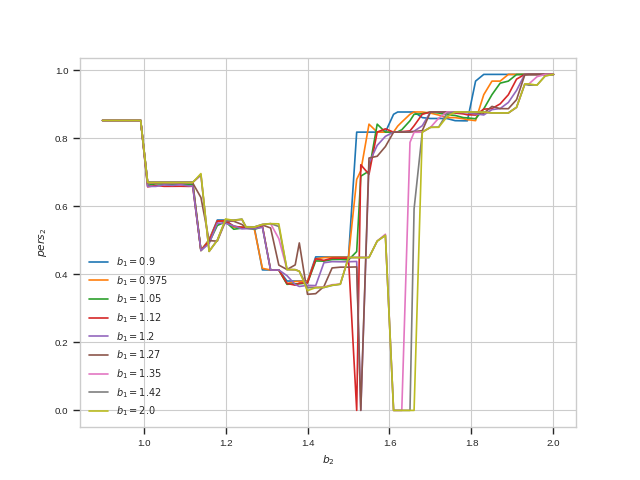

In [16]:
fig = plt.figure("Persistence f_2")
for i in range(8):
    plt.plot(b2, persistence[7*i, ..., 1], label=f"$b_1={b1[4*i]}$")
plt.plot(b2, persistence[-1, ..., 1], label=f"$b_1={b1[-1]}$")
plt.ylabel('$pers_2$')
plt.xlabel('$b_2$')
plt.legend()
plt.show()